Faces shape: (16380, 3)
Vertices shape: (8192, 3)
Distances shape: (8192,)


C:\Users\Administrator\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


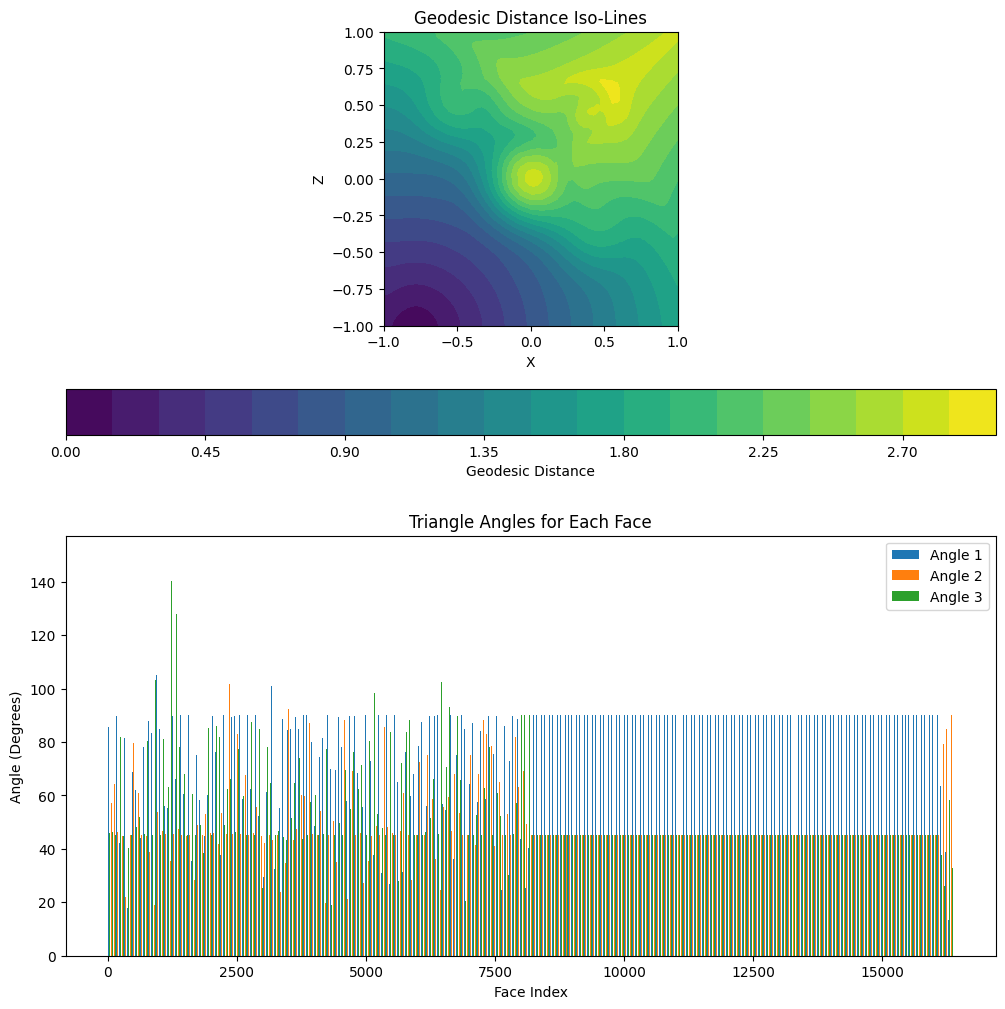

In [2]:
import numpy as np
import matplotlib.pyplot as plt

file_path = "D:/CG/log.txt"

with open(file_path, "r") as file:
    lines = file.readlines()

numbFaces = int(lines[0].strip())

faces = np.array([list(map(int, lines[i].strip().split())) for i in range(1, 1 + numbFaces)])

num_vertices = int(lines[1 + numbFaces].strip())

source_vertex = int(lines[2 + numbFaces].strip())

distances = np.array([float(lines[i].strip()) for i in range(3 + numbFaces, 3 + numbFaces + num_vertices)])

vertices = np.array([
    list(map(float, lines[i].strip().split())) 
    for i in range(3 + numbFaces + num_vertices, 3 + numbFaces + 2 * num_vertices)
])

assert faces.shape[1] == 3, "Each face must have exactly 3 vertices"
assert len(distances) == num_vertices, "Distances array length must match the number of vertices"
assert vertices.shape[1] == 3, "Each vertex must have exactly 3 coordinates"

print("Faces shape:", faces.shape)
print("Vertices shape:", vertices.shape)
print("Distances shape:", distances.shape)

x = vertices[:, 0]
y = distances
z = vertices[:, 2]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

contour = ax1.tricontourf(x, z, faces, y, levels=20, cmap="viridis")
cbar = fig.colorbar(contour, ax=ax1, orientation="horizontal", label="Geodesic Distance")

ax1.set_title("Geodesic Distance")
ax1.set_xlabel("X")
ax1.set_ylabel("Z")
ax1.set_aspect("equal")

v0 = vertices[faces[:, 0]]
v1 = vertices[faces[:, 1]]
v2 = vertices[faces[:, 2]]

a = np.linalg.norm(v1 - v2, axis=1)
b = np.linalg.norm(v2 - v0, axis=1)
c = np.linalg.norm(v0 - v1, axis=1)

angle_0 = np.arccos((b**2 + c**2 - a**2) / (2 * b * c))
angle_1 = np.arccos((a**2 + c**2 - b**2) / (2 * a * c))
angle_2 = np.arccos((a**2 + b**2 - c**2) / (2 * a * b))

angles = np.degrees(np.stack((angle_0, angle_1, angle_2), axis=1))


for i in range(3):  
    ax2.bar(
        np.arange(len(angles)) + i * 0.25,  
        angles[:, i],
        width=0.25,
        label=f"Angle {i + 1}"
    )

ax2.set_title("Triangle Angles for Each Face")
ax2.set_xlabel("Face Index")
ax2.set_ylabel("Angle (Degrees)")
ax2.legend()

plt.show()

max_angle = np.max(angles)
min_angle = np.min(angles)
mean_angle = np.mean(angles)
